# Sales from Kings Shopping Mall

### Exploratory Data Analysis

In [1]:
#Importing all my necessary libraries for data analysis

import numpy as np #data analysis
import pandas as pd #data analysis

import matplotlib.pyplot as plt #data visualisation 
%matplotlib inline
import seaborn as sns #data visualisation
import missingno as msno # Missing data-#data visualisation
from collections import Counter # Counting use capital C

In [2]:
df = pd.read_csv("Sale Data Intern.csv")

In [3]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Dates ordered,Months ordered
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,30-12-2019,December
1,1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,29-12-2019,December
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,12-12-2019,December
3,3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,22-12-2019,December
4,4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,18-12-2019,December


In [4]:
df.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Dates ordered       0
Months ordered      0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
 11  Dates ordered     185950 non-null  object 
 12  Months ordered    185950 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 18.4+ MB


In [7]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [8]:
df['City'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

In [9]:
# I am changing my date format from object to int and break it down to year, months, and weeks

df['Order Date'] = pd.to_datetime(df['Order Date']) 
df['Order Date']

0        2019-12-30 00:01:00
1        2019-12-29 07:03:00
2        2019-12-12 18:21:00
3        2019-12-22 15:13:00
4        2019-12-18 12:38:00
                 ...        
185945   2019-06-07 19:02:00
185946   2019-06-01 19:29:00
185947   2019-06-22 18:57:00
185948   2019-06-26 18:35:00
185949   2019-06-25 14:33:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [10]:
# Year 

df['Order Date'].dt.year

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
185945    2019
185946    2019
185947    2019
185948    2019
185949    2019
Name: Order Date, Length: 185950, dtype: int64

In [11]:
df['Order Date'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
185945     6
185946     6
185947     6
185948     6
185949     6
Name: Order Date, Length: 185950, dtype: int64

In [12]:
df['Order Date'].dt.quarter

0         4
1         4
2         4
3         4
4         4
         ..
185945    2
185946    2
185947    2
185948    2
185949    2
Name: Order Date, Length: 185950, dtype: int64

In [13]:
# Now i am adding the column to the table

df['year'] = df['Order Date'].dt.year 

df['month'] = df['Order Date'].dt.month 

df['quarter'] = df['Order Date'].dt.quarter

df.head(1)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Dates ordered,Months ordered,year,month,quarter
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,30-12-2019,December,2019,12,4


In [14]:
df.rename(columns={'Sales': 'Total Revenue'}, inplace=True)

In [15]:
df.head(1)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Revenue,City,Hour,Dates ordered,Months ordered,year,month,quarter
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0,30-12-2019,December,2019,12,4


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Total Revenue       0
City                0
Hour                0
Dates ordered       0
Months ordered      0
year                0
month               0
quarter             0
dtype: int64


<Axes: >

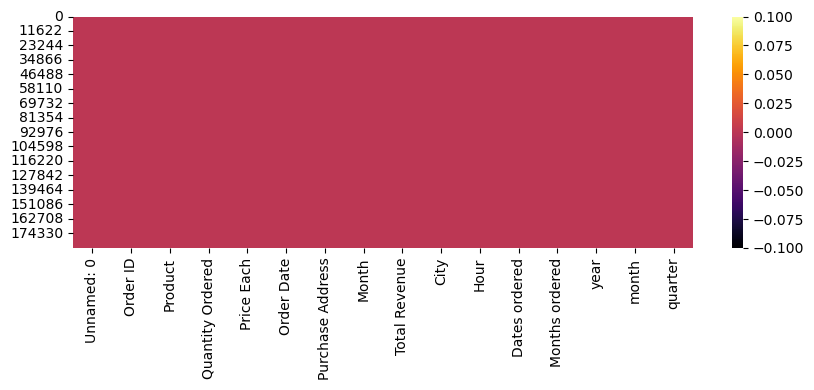

In [16]:
df.isnull().sum() # you can also use df.isna().sum() 
print (df.isnull().sum())

#visuliasing the missing data 

plt.figure(figsize = (10,3))

sns.heatmap(df.isnull(), cbar = True, cmap = 'inferno')

In [17]:
# df.to_csv(r"C:\Users\22077\Downloads\Sales_Data.csv", index=False) to export the table out
